In [85]:
import datetime
import numpy as np
import pandas as pd
from datetime import date
import plotly.express as px
from nsepy import get_history
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [73]:
stock_name = input('Enter NSE Stock Name: ').upper()
date_entry = input('Enter a date in yyyy,m,d format')
year, month, day = map(int, date_entry.split(','))
start_date= datetime.date(year, month, day)
end_date = date.today()
# get_history(symbol = 'SBIN', start=date(2015,1,1), end=date(2022,3,1))
def stock_df(s, sd, ed):
    df = get_history(symbol=s, start=sd, end=ed)
    return df

In [74]:
df = stock_df(stock_name, start_date, end_date)
df.reset_index(inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.0,310.7,314.0,314.0,313.67,6138488,192548886370000.0,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.0,314.35,318.3,314.35,315.6,315.25,316.8,9935094,314738862990000.0,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.8,312.1,312.8,312.75,313.84,9136716,286743167500000.0,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.0,311.1,298.7,299.9,299.9,305.14,15329257,467760129725000.0,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.9,300.0,302.55,295.15,301.4,300.15,299.95,15046745,451324303375000.0,147185,5631400,0.3743


In [75]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
0,312.45,315.0,310.7,314.0,6138488
1,314.35,318.3,314.35,315.25,9935094
2,316.25,316.8,312.1,312.75,9136716
3,310.0,311.1,298.7,299.9,15329257
4,300.0,302.55,295.15,300.15,15046745


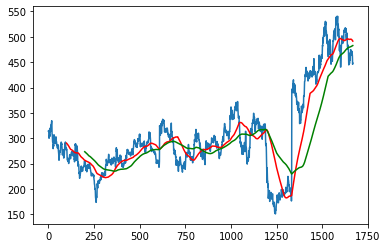

In [76]:
plt.plot(df.Close)
plt.plot(df.Close.rolling(100).mean(), color='red')
plt.plot(df.Close.rolling(200).mean(), color='green')

In [77]:
train_df = pd.DataFrame(df.Close[0:int(len(df.Close)*0.75)])
test_df = pd.DataFrame(df.Close[int(len(df.Close)*0.75):int(len(df))])
train_df.shape, test_df.shape

((1251, 1), (417, 1))

In [78]:
train_df.head()

,Close
0,314.0
1,315.25
2,312.75
3,299.9
4,300.15


In [79]:
test_df.head()

,Close
1251,174.05
1252,187.8
1253,186.8
1254,184.45
1255,187.7


In [80]:
scaler = minmax_scaler = MinMaxScaler(feature_range=(0, 1))
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.fit_transform(test_df)

In [81]:
train_df_scaled

array([[0.73640262],
       [0.74204469],
       [0.73076055],
       ...,
       [0.08666215],
       [0.08756488],
       [0.10855337]])

In [82]:
X_train = []
y_train = []
for i in range(100, len(train_df_scaled)):
    X_train.append(train_df_scaled[i-100 : i])
    y_train.append(train_df_scaled[i, 0])

X_train

[array([[0.73640262],
        [0.74204469],
        [0.73076055],
        [0.6727601 ],
        [0.67388851],
        [0.69510269],
        [0.68765516],
        [0.70525841],
        [0.6962311 ],
        [0.69442564],
        [0.76483864],
        [0.74294742],
        [0.73256601],
        [0.75513428],
        [0.79146919],
        [0.78447303],
        [0.79711126],
        [0.80884676],
        [0.82938389],
        [0.79508012],
        [0.71360867],
        [0.70706387],
        [0.67456556],
        [0.64184157],
        [0.63168585],
        [0.62942902],
        [0.58068156],
        [0.61588806],
        [0.60979463],
        [0.6023471 ],
        [0.70458136],
        [0.70345295],
        [0.69893929],
        [0.68381855],
        [0.68359287],
        [0.65763936],
        [0.65628526],
        [0.65312571],
        [0.62536673],
        [0.6727601 ],
        [0.68065899],
        [0.68223877],
        [0.68494696],
        [0.64545249],
        [0.64522681],
        [0

In [83]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1151, 100, 1)

In [86]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, 
                input_shape=(X_train.shape[1], 1))) # input_shape=(timesteps, features)
model.add(Dropout(0.2))
#layer 2
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
#layer 3
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
#layer 4
model.add(LSTM(units=120, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units = 120))


In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [89]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
36/36 [==============================] - 14s 285ms/step - loss: 0.2716
Epoch 2/50
36/36 [==============================] - 10s 290ms/step - loss: 0.1200
Epoch 3/50
36/36 [==============================] - 18s 501ms/step - loss: 0.0381
Epoch 4/50
36/36 [==============================] - 21s 591ms/step - loss: 0.0282
Epoch 5/50
36/36 [==============================] - 13s 346ms/step - loss: 0.0231
Epoch 6/50
36/36 [==============================] - 11s 312ms/step - loss: 0.0195
Epoch 7/50
36/36 [==============================] - 12s 346ms/step - loss: 0.0195
Epoch 8/50
36/36 [==============================] - 11s 318ms/step - loss: 0.0164
Epoch 9/50
36/36 [==============================] - 12s 330ms/step - loss: 0.0144
Epoch 10/50
36/36 [==============================] - 12s 326ms/step - loss: 0.0131
Epoch 11/50
36/36 [==============================] - 12s 325ms/step - loss: 0.0132
Epoch 12/50
36/36 [==============================] - 12s 349ms/step - loss: 0.0142
Epoch 13/50
3

In [90]:
model.save('stock_prediction.h5')

In [93]:
train_df.tail(100)

,Close
1151,318.4
1152,319.8
1153,330.2
1154,332.25
1155,330.75
...,...
1246,158.2
1247,161.3
1248,170.05
1249,170.25


In [92]:
past_100 = train_df.tail(100)

In [96]:
final_df = past_100.append(test_df, ignore_index=True)
final_df.head()

C:\Users\chinn\AppData\Local\Temp\ipykernel_16372\2591333897.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(test_df, ignore_index=True)


,Close
0,318.4
1,319.8
2,330.2
3,332.25
4,330.75


In [97]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.42994611],
       [0.43353862],
       [0.46022581],
       [0.46548627],
       [0.46163716],
       [0.45458045],
       [0.44495766],
       [0.44251989],
       [0.42891968],
       [0.41865538],
       [0.41788555],
       [0.42417244],
       [0.44226328],
       [0.44444444],
       [0.42430074],
       [0.42147806],
       [0.42494226],
       [0.41018732],
       [0.43007442],
       [0.3894021 ],
       [0.37785476],
       [0.39876828],
       [0.41095715],
       [0.43905568],
       [0.43546318],
       [0.43020272],
       [0.44521427],
       [0.43456505],
       [0.4531691 ],
       [0.43251219],
       [0.41916859],
       [0.42776495],
       [0.43494996],
       [0.45368232],
       [0.44162176],
       [0.45150115],
       [0.45509366],
       [0.43905568],
       [0.39042853],
       [0.35039774],
       [0.35668463],
       [0.34500898],
       [0.35322043],
       [0.30703105],
       [0.26327945],
       [0.24185271],
       [0.15845522],
       [0.233

In [98]:
input_data.shape

(517, 1)

In [99]:
X_test = []
y_test = []
for i in range(100, len(input_data)):
    X_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [100]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((417, 100, 1), (417,))

In [101]:
y_pred = model.predict(X_test)

In [103]:
scaler.scale_

array([0.00256608])

In [104]:
scale_factor = 1/0.00256608
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

Text(0, 0.5, 'Price')

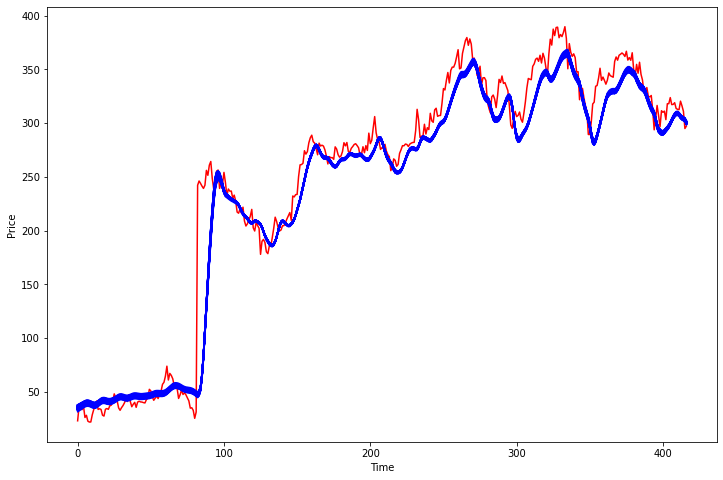

In [108]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')